In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import sys
sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("../../datos/datos1/datos_nulos_minmax_encoded.csv", index_col=0).reset_index(drop=True)

In [3]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       424 non-null    float64
 1   bathrooms                   424 non-null    float64
 2   province                    424 non-null    float64
 3   municipality                424 non-null    float64
 4   district                    424 non-null    float64
 5   size_MinMax                 424 non-null    float64
 6   distance_MinMax             424 non-null    float64
 7   propertyType_chalet         424 non-null    float64
 8   propertyType_countryHouse   424 non-null    float64
 9   propertyType_duplex         424 non-null    float64
 10  propertyType_flat           424 non-null    float64
 11  propertyType_penthouse      424 non-null    float64
 12  propertyType_studio         424 non-null    float64
 13  exterior_False              424 non

In [4]:
df_encoded.head()

,price,bathrooms,province,municipality,district,size_MinMax,distance_MinMax,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,status_desconocido,status_good,status_newdevelopment,status_renew,newDevelopment_False,newDevelopment_True,newDevelopment_desconocido,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_bj,floor_desconocido,floor_en,floor_ss,floor_st,hasLift_False,hasLift_True,hasLift_desconocido,parkingSpace_False,parkingSpace_True,parkingSpace_desconocido
0,750.00,680.23,693.41,705.59,687.21,0.31,0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,750.00,680.23,693.41,687.37,685.64,0.39,0.27,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,400.00,650.45,693.41,639.59,601.63,0.36,0.92,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,450.00,680.23,593.40,646.09,601.63,0.53,0.79,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,450.00,680.23,593.40,650.54,601.63,0.31,0.64,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


Separamos en x e y

In [5]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [6]:
x.head()

,bathrooms,province,municipality,district,size_MinMax,distance_MinMax,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,status_desconocido,status_good,status_newdevelopment,status_renew,newDevelopment_False,newDevelopment_True,newDevelopment_desconocido,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_bj,floor_desconocido,floor_en,floor_ss,floor_st,hasLift_False,hasLift_True,hasLift_desconocido,parkingSpace_False,parkingSpace_True,parkingSpace_desconocido
0,680.23,693.41,705.59,687.21,0.31,0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,680.23,693.41,687.37,685.64,0.39,0.27,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,650.45,693.41,639.59,601.63,0.36,0.92,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,680.23,593.40,646.09,601.63,0.53,0.79,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,680.23,593.40,650.54,601.63,0.31,0.64,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [7]:
y.head()

,price
0,750.00
1,750.00
2,400.00
3,450.00
4,450.00


Separamos en train y test y le hacemos aprender

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [9]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

In [10]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [11]:
metricas_pd=pd.DataFrame(metricas)

In [12]:
metricas_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.63,37.18,"2,356.99",48.55
test,0.62,37.99,"2,371.96",48.70


In [13]:
metricas_pd.reset_index(inplace=True)

In [14]:
metricas_pd.T

,0,1,2,3
index,r2_score,MAE,MSE,RMSE
train,0.63,37.18,"2,356.99",48.55
test,0.62,37.99,"2,371.96",48.70


Dado que coinciden bastante las RMSE, no se está dando un gran over fitting 

Vamos a intentar visualizar las cositas

In [15]:
predytets=pd.DataFrame(y_test_pred, columns=["y_test_pred"])

In [16]:
predytrain=pd.DataFrame(y_train_pred, columns=["y_train_pred"])

In [17]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytets, predytrain, y], ignore_index=True, axis=1)

In [18]:
df_fin.columns= ["test pre", "train pre", "precio"]

In [19]:
df_fin.reset_index(inplace=True)

VOY A PROBAR COGIENDO UN 80 DE ENTRENAMIENTO

In [20]:
x_train80, x_test80, y_train80, y_test80 = train_test_split(x, y, train_size= 0.8, random_state=42)
modelo_lineal80= LinearRegression()
modelo_lineal80.fit(x_train80, y_train80) 

LinearRegression()

Ahora hacemos la predicción

In [21]:
y_test_pred80=modelo_lineal80.predict(x_test80)         #con esto predice un precio
y_train_pred80= modelo_lineal80.predict(x_train80)

In [22]:
metricas80 = {
    'train': {
        'r2_score': r2_score(y_train80, y_train_pred80),
        'MAE': mean_absolute_error(y_train80, y_train_pred80),
        'MSE': mean_squared_error(y_train80, y_train_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_train80, y_train_pred80))
    },
    'test': {
        'r2_score': r2_score(y_test80, y_test_pred80),
        'MAE': mean_absolute_error(y_test80, y_test_pred80),
        'MSE': mean_squared_error(y_test80, y_test_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_test80, y_test_pred80))

    }
}

In [23]:
metricas80_pd=pd.DataFrame(metricas80)

In [24]:
metricas80_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.63,37.62,"2,388.47",48.87
test,0.65,34.94,"1,998.43",44.70


In [25]:
metricas80_pd.reset_index(inplace=True)

In [26]:
metricas80_pd

,index,train,test
0,r2_score,0.63,0.65
1,MAE,37.62,34.94
2,MSE,"2,388.47","1,998.43"
3,RMSE,48.87,44.70


Se está dando over fitting y under fitting asi que mejor el de 70% train 30% test

Vamos a intentar visualizar las cositas

In [27]:
predytets80=pd.DataFrame(y_test_pred80, columns=["y_test_pred80"])

In [28]:
predytrain80=pd.DataFrame(y_train_pred80, columns=["y_train_pred80"])

In [29]:
df_fin80=pd.DataFrame()
df_fin80=pd.concat([df_fin80, predytets80, predytrain80, y], ignore_index=True, axis=1)

In [30]:
df_fin80.columns= ["test pre80", "train pre80", "precio"]

In [31]:
df_fin80.reset_index(inplace=True)

<Figure size 1000x800 with 0 Axes>

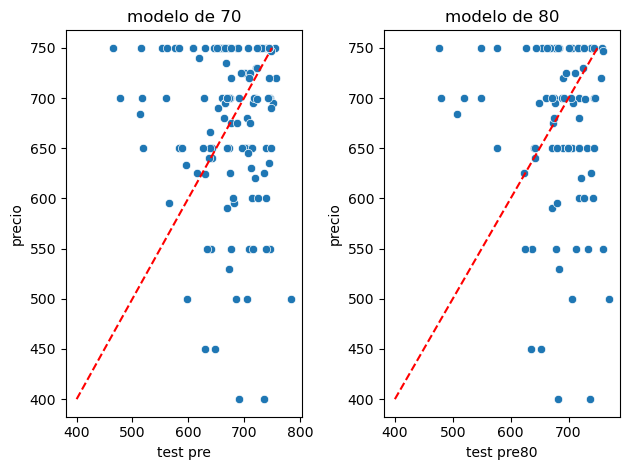

In [32]:
plt.figure(figsize=(10,8))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat

sns.scatterplot(x="test pre", y="precio", data= df_fin, ax=axes[0])
axes[0].plot([df_fin["precio"].min(), df_fin["precio"].max()],
         [df_fin["precio"].min(), df_fin["precio"].max()],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="test pre80", y="precio", data= df_fin80, ax= axes[1])
axes[1].plot([df_fin80["precio"].min(), df_fin80["precio"].max()],
         [df_fin80["precio"].min(), df_fin80["precio"].max()],
         color='red', linestyle='--', label='x = y')
axes[1].set_title("modelo de 80")
plt.tight_layout()

In [33]:
metricas_pd

,index,train,test
0,r2_score,0.63,0.62
1,MAE,37.18,37.99
2,MSE,"2,356.99","2,371.96"
3,RMSE,48.55,48.70


In [34]:
metricas80_pd

,index,train,test
0,r2_score,0.63,0.65
1,MAE,37.62,34.94
2,MSE,"2,388.47","1,998.43"
3,RMSE,48.87,44.70


DEFINITIVAMENTE, nos quedamos con el modelo de 70% train.

Creamos un dataframe con el valor real y los residuos para ambas formas de entrenar 

In [35]:
df_residuos= y_test_pred - y_test
df_residuos80= y_test_pred80 - y_test80

In [36]:
df_con_residuos=pd.DataFrame()
df_con_residuos=pd.concat([df_con_residuos,df_residuos, y_test], ignore_index=True, axis=1)

df_con_residuos80=pd.DataFrame()
df_con_residuos80=pd.concat([df_con_residuos80,df_residuos80, y_test80], ignore_index=True, axis=1)

In [37]:
df_con_residuos.columns=["residuo", "precio original"]
df_con_residuos80.columns=["residuo80", "precio original80"]

In [38]:
df_con_residuos.head()

,residuo,precio original
145,33.42,695.00
280,-40.70,700.00
175,6.08,730.00
373,-69.83,700.00
420,-51.91,700.00


In [39]:
df_con_residuos80.head()

,residuo80,precio original80
145,20.93,695.00
280,-21.98,700.00
175,7.03,730.00
373,-64.93,700.00
420,-47.53,700.00


<Figure size 1000x1800 with 0 Axes>

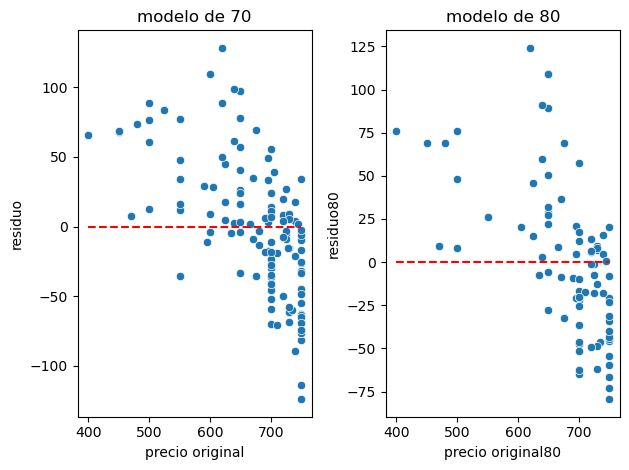

In [42]:
plt.figure(figsize=(10,18))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat


sns.scatterplot(x="precio original", y="residuo", data= df_con_residuos, ax= axes[0])
axes[0].plot([df_con_residuos["precio original"].min(), df_con_residuos["precio original"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="precio original80", y="residuo80", data= df_con_residuos80, ax=axes[1])
axes[1].plot([df_con_residuos80["precio original80"].min(), df_con_residuos80["precio original80"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')

axes[1].set_title("modelo de 80")
plt.tight_layout()

Aquí observamos como los residuos se alejan de la línea 0 que representa que no haya diferencias entre los valores predichos y los valores reales

## Con todo lo anterior hemos comprobado que el precio no presenta una relación lineal